## Import necessary modules
Run this cell before running any other cells

In [147]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
from uuid import uuid4
uuid4()

UUID('28a3160c-6680-46ad-9618-ad55b46a6fee')

# Printing and Logging
## Printing
You can use the **print()** function in Python to print messages to the screen. <br>
The message can be a string, or any other object, the object will be converted into a string before it is written to the screen. <br>

## Logging
You could use the logging module that is setup in *utils.py*. <br>
It prints to both your screen (standard output) as well as to log files (*ble.log*) in the *logs* directory. <br>
This is the recommended way to output messages, since the log files can help with debugging. <br>
The logging module also provides different log levels as shown below, each formatted with a different color for increased visibility. <br>

__**NOTE**__: You may notice that the DEBUG message is not printed to the screen but is printed in the log file. This is because the logging level for the screen is set to INFO and for the file is set to DEBUG. You can change the default log levels in *utils.py* (**STREAM_LOG_LEVEL** and **FILE_LOG_LEVEL**). 

## Formatting output
To format your strings, you may use %-formatting, str.format() or f-strings. <br>
The most "pythonic" way would be to use f-strings. [Here](https://realpython.com/python-f-strings/) is a good tutorial on f-strings. <br>

In [148]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2025-02-04 12:45:12,357 | INFO     |: info
2025-02-04 12:45:12,358 | WARNING  |: warning
2025-02-04 12:45:12,360 | ERROR    |: error
2025-02-04 12:45:12,362 | CRITICAL |: critical


<hr>

# BLE
## ArtemisBLEController
The class **ArtemisBLEController** (defined in *ble.py*) provides member functions to handle various BLE operations to send and receive data to/from the Artemis board, provided the accompanying Arduino sketch is running on the Artemis board. <br>

<table align="left">
     <tr>
        <th style="text-align: left; font-size: medium">Member Functions</th>
        <th style="text-align: left; font-size: medium">Description</th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">reload_config()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Reload changes made in <em>connection.yaml.</em></span></th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">connect()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Connect to the Artemis board, whose MAC address is specified in <em>connection.yaml</em>.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">disconnect()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Disconnect from the Artemis board.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">is_connected()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Return a boolean indicating whether your controller is connected to the Artemis board or not.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">send_command(cmd_type, data)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Send the command <strong>cmd_type</strong> (integer) with <strong>data</strong> (string) to the Artemis board.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">receive_float(uuid) <br> receive_string(uuid) <br> receive_int(uuid)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Read the GATT characteristic (specified by its <strong>uuid</strong>) of type float, string or int. <br> The type of the GATT
            characteristic is determined by the classes BLEFloatCharacteristic, BLECStringCharacteristic or
            BLEIntCharacteristic in the Arduino sketch.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">start_notify(uuid, notification_handler)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Activate notifications on the GATT characteristic (specified by its <strong>uuid</strong>). <br> <strong>notification_handler</strong> is a
            function callback which must accept two inputs; the first will be a uuid string object and the second will
            be the bytearray of the characteristic value.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">bytearray_to_float(byte_array) <br> bytearray_to_string(byte_array) <br> bytearray_to_int(byte_array)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Convert the <strong>bytearray</strong> to float, string or int, respectively. <br> You may use these functions inside your
            notification callback function.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">stop_notify(uuid)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Stop notifications on the GATT characteristic (specified by its <strong>uuid</strong>).</span></th>
    </tr>
</table>

<table align="left">
     <tr>
        <th style="text-align: left; font-size: medium">Member Variables</th>
        <th style="text-align: left; font-size: medium">Description</th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">uuid</span></th>
        <th style="text-align: left"><span style="font-weight: normal">A dictionary that stores the UUIDs of the various characteristics specified in <em>connection.yaml</em>.</span></th>
    </tr>
</table>

## Configuration
- The MAC address, Service UUID and GATT characteristic UUIDs are defined in the file: *connection.yaml*.
- They should match the UUIDs used in the Arduino sketch.
- The artemis board running the base code should display its MAC address in the serial monitor.
- Update the **artemis_address** in *connection.yaml*, accordingly.
- Make sure to call **ble.reload_config()** or **get_ble_controller()** (which internally calls **reload_config()**) after making any changes to your configuration file.

<hr>

In the below cell, we create an **ArtemisBLEController** object using **get_ble_controller()** (defined in *ble.py*), which creates and/or returns a single instance of **ArtemisBLEController**. <br>
<span style="color:rgb(240,50,50)"> __NOTE__: Do not use the class directly to instantiate an object. </span><br>

In [149]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2025-02-04 12:45:15,660 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:83:24:6c:39:3c
2025-02-04 12:45:22,088 | INFO     |: Connected to c0:83:24:6c:39:3c


## Receive data from the Artemis board

The cell below shows examples of reading different types (as defined in the Arduino sketch) of GATT characteristics.

In [150]:
# Read a float GATT Charactersistic
f = ble.receive_float(ble.uuid['RX_FLOAT'])
print(f)

3.5


In [151]:
# Read a string GATT Charactersistic
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

[->9.000<-]


## Send a command to the Artemis board
Send the PING command and read the reply string from the string characteristic RX_STRING. <br>
__NOTE__: The **send_command()** essentially sends a string data to the GATT characteristic (TX_CMD_STRING). The GATT characteristic in the Arduino sketch is of type BLECStringCharacteristic.

In [152]:
ble.send_command(CMD.PING, "")

In [153]:
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

PONG


The cell below shows an example of the SEND_TWO_INTS command. <br> The two values in the **data** are separated by a delimiter "|". <br>
Refer Lab 2 documentation for more information on the command protocol.

In [28]:
ble.send_command(CMD.SEND_TWO_INTS, "2|-6")

The Artemis board should print the two integers to the serial monitor in the ArduinoIDE. 

In [29]:
ble.send_command(CMD.ECHO, "HiHello")

In [30]:
ble.send_command(CMD.SEND_THREE_FLOATS, "1.0| 2.0| 3.0")

In [31]:
ble.send_command(CMD.GET_TIME_MILLIS, "")
m = ble.receive_string(ble.uuid['RX_STRING'])
print(m)

T: 69456


In [154]:
def notification_handler(uuid, array):
    string = ble.bytearray_to_string(array)
    print(f'Current time is: {string}')
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)


In [99]:
ble.send_command(CMD.GET_TIME_MILLIS, "")

In [100]:
ble.send_command(CMD.TIME_LOOP, "")
print("Number of timestamps is: ")

Current time is: T: 26378
Number of timestamps is: 
Current time is: T: 26505
Current time is: T: 26505
Current time is: T: 26505
Current time is: T: 26505
Current time is: T: 26546
Current time is: T: 26593
Current time is: T: 26593
Current time is: T: 26636
Current time is: T: 26636
Current time is: T: 26636
Current time is: T: 26682
Current time is: T: 26682
Current time is: T: 26727
Current time is: T: 26727
Current time is: T: 26727
Current time is: T: 26766
Current time is: T: 26766
Current time is: T: 26809
Current time is: T: 26819
Current time is: T: 26819
Current time is: T: 26853
Current time is: T: 26861
Current time is: T: 26861
Current time is: T: 26898
Current time is: T: 26898
Current time is: T: 26898
Current time is: T: 26946
Current time is: T: 26946
Current time is: T: 26986
Current time is: T: 26986
Current time is: T: 26986
Current time is: T: 27032
Current time is: T: 27032
Current time is: T: 27079
Current time is: T: 27079
Current time is: T: 27079
Current time

In [101]:
ble.send_command(CMD.SEND_TIME_DATA, "")

Current time is: For sample 0: 36921
Current time is: For sample 1: 36921
Current time is: For sample 2: 36921
Current time is: For sample 3: 36921
Current time is: For sample 4: 36921
Current time is: For sample 5: 36921
Current time is: For sample 6: 36921
Current time is: For sample 7: 36921
Current time is: For sample 8: 36921
Current time is: For sample 9: 36921
Current time is: For sample 10: 36921
Current time is: For sample 11: 36921
Current time is: For sample 12: 36921
Current time is: For sample 13: 36921
Current time is: For sample 14: 36921
Current time is: For sample 15: 36921
Current time is: For sample 16: 36921
Current time is: For sample 17: 36921
Current time is: For sample 18: 36921
Current time is: For sample 19: 36921
Current time is: For sample 20: 36921
Current time is: For sample 21: 36921
Current time is: For sample 22: 36921
Current time is: For sample 23: 36921
Current time is: For sample 24: 36921
Current time is: For sample 25: 36921
Current time is: For s

In [155]:
ble.send_command(CMD.GET_TEMP_READINGS, "")

Current time is: For sample 0: The temperature is: 85 °F and is during time 36989
Current time is: For sample 1: The temperature is: 86 °F and is during time 36990
Current time is: For sample 2: The temperature is: 86 °F and is during time 36990
Current time is: For sample 3: The temperature is: 85 °F and is during time 36990
Current time is: For sample 4: The temperature is: 85 °F and is during time 36991
Current time is: For sample 5: The temperature is: 86 °F and is during time 36991
Current time is: For sample 6: The temperature is: 86 °F and is during time 36991
Current time is: For sample 7: The temperature is: 86 °F and is during time 36991
Current time is: For sample 8: The temperature is: 87 °F and is during time 36991
Current time is: For sample 9: The temperature is: 85 °F and is during time 36992
Current time is: For sample 10: The temperature is: 86 °F and is during time 36992
Current time is: For sample 11: The temperature is: 85 °F and is during time 36992
Current time i

In [103]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Current time is: aaaaaaaaaa
10
aaaaaaaaaa
44.692285971539235
Current time is: aaaaaaaaaaaaaaaaaaaa
20
aaaaaaaaaaaaaaaaaaaa
91.49698195279761
Current time is: aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
30
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
136.5917286687234
Current time is: aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
40
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
182.84737775365565
Current time is: aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
50
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
189.86483183196776
Current time is: aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
60
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
229.0025588480452
Current time is: aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
70
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
229.0460305622213
Current time is: aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
80
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

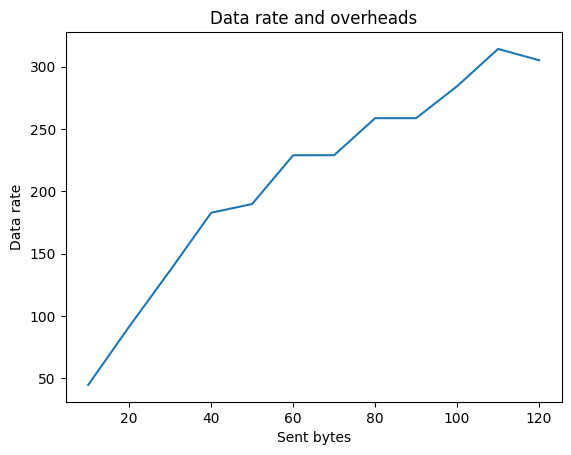

In [114]:
# import matplotlib.pyplot as plt
# transfer = []
# byte_size = list(range(10, 121, 10))
# for i in byte_size:
#     sent_data = 'a' * i 
#     start_time = time.time()
#     ble.send_command(CMD.CALCULATE_DATA_RATE, sent_data)
#     received_data = 0
#     while received_data == 0:
#         received_data = ble.receive_string(ble.uuid['RX_STRING'])
#         end_time = time.time()
#     rate = i/(end_time-start_time)
#     transfer.append(rate)
#     print(i)
#     print(received_data)
#     print(rate)
# x = byte_size
# y = transfer
# plt.plot(x,y)
# plt.xlabel("Sent bytes")
# plt.ylabel("Data rate")
# plt.title("Data rate and overheads")

# plt.show()

Bytes sent = 5 bytes
Current time is: aaaaa
Data rate = 28.61283513952692 bytes/s
Start time = 1738690627.9788892 s and end time = 1738690628.153636 s
Time difference is = 0.17474675178527832 s
aaaaa


Bytes sent = 15 bytes
Current time is: aaaaaaaaaaaaaaa
Data rate = 85.91540179028657 bytes/s
Start time = 1738690628.1537151 s and end time = 1738690628.3283055 s
Time difference is = 0.1745903491973877 s
aaaaaaaaaaaaaaa


Bytes sent = 25 bytes
Current time is: aaaaaaaaaaaaaaaaaaaaaaaaa
Data rate = 113.83471984141373 bytes/s
Start time = 1738690628.32837 s and end time = 1738690628.5479867 s
Time difference is = 0.21961665153503418 s
aaaaaaaaaaaaaaaaaaaaaaaaa


Bytes sent = 35 bytes
Current time is: aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
Data rate = 160.32431676801565 bytes/s
Start time = 1738690628.5481057 s and end time = 1738690628.7664132 s
Time difference is = 0.2183074951171875 s
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa


Bytes sent = 45 bytes
Current time is: aaaaaaaaaaaaaaaaaaaaaaaaaaaaa

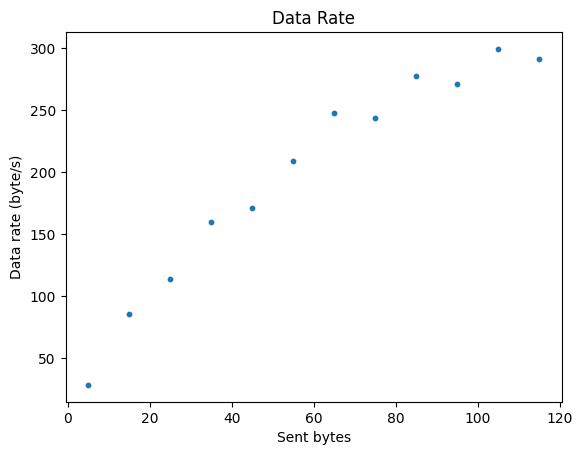

2025-02-04 12:40:28,924 | INFO     |: Disconnected from C0:83:24:6C:39:3C


In [127]:
import matplotlib.pyplot as plt
message = []
times = []
times_array = []

def notification_handler(uuid, byte_array):
    global message, times, times_array
    message.append(ble.bytearray_to_string(byte_array)[:])
    data = ble.bytearray_to_string(byte_array)
    extract = data.split("!")
    time = extract[0][2:]
    times_array.append(ble.bytearray_to_string(byte_array)[:])
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

data_rate = []
# byte_size = list(range(5, 121, 5))
# sent_bytes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]
change_data = 10
num =  0
num2 = 0
sent_bytes = ble.send_command(CMD.CALCULATE_DATA_RATE)
for i in sent_bytes:
    sent_data = 'a' * i 
    print(f"Bytes sent = {sent_bytes[num]} bytes")
    num += 1
    start_time = time.time()
    ble.send_command(CMD.CALCULATE_DATA_RATE, sent_data)
    received_data = 0
    while not received_data:
        received_data = ble.receive_string(ble.uuid['RX_STRING'])
        end_time = time.time()
    data_rate.append(i/(end_time-start_time))
    print(f"Data rate = {data_rate[num2]} bytes/s")
    num2 += 1
    print(f"Start time = {start_time} s and end time = {end_time} s")
    print(f"Time difference is = {end_time-start_time} s")
    print(sent_data)
    print("\n")
    i += change_data
    # transfer.append(rate)
    # print(i)
    # print(received_data)
    # print(rate)
# x = byte_size
# y = transfer

plt.plot(figsize=(5,5))
plt.scatter(sent_bytes, data_rate, s=10)
plt.title("Data Rate")
plt.xlabel("Sent bytes")
plt.ylabel("Data rate (byte/s)")
# plt.title("Data rate and overheads")
plt.show()

## Disconnect

# Disconnect
ble.disconnect()